In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings

In [2]:
warnings.simplefilter(action="ignore")


In [5]:
covid=pd.read_csv("/content/Covid Dataset.csv")
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [6]:
covid.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [7]:
covid["COVID-19"].value_counts()

COVID-19
Yes    4383
No     1051
Name: count, dtype: int64

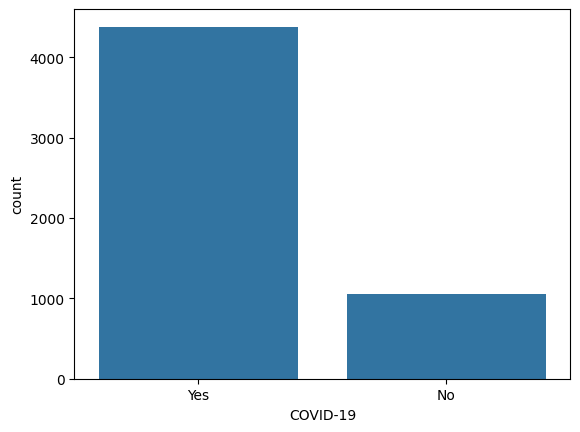

In [8]:
sns.countplot(x="COVID-19",data=covid)
sns.set_theme(style="darkgrid")
sns.set_color_codes("pastel")


Text(0.5, 1.0, 'Percentage of COVID Positive')

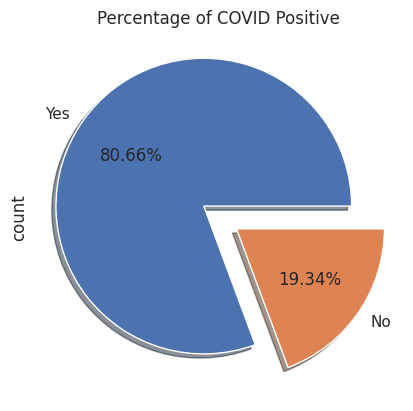

In [11]:
covid["COVID-19"].value_counts().plot.pie(explode=[0.12,0.15],autopct='%1.2f%%',shadow=True)
plt.title('Percentage of COVID Positive')

In [12]:

features = covid.columns.tolist()
features.remove('COVID-19')
print(features)


['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market']


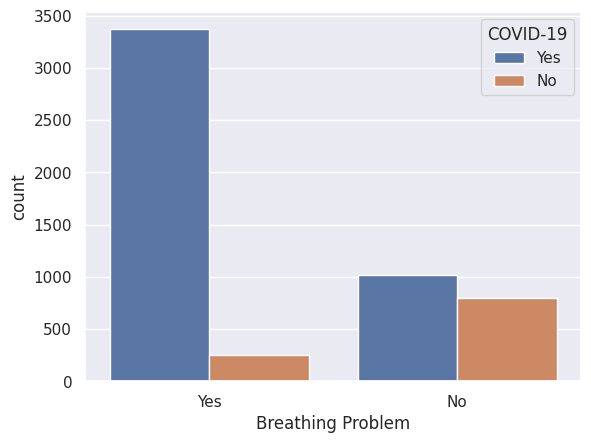

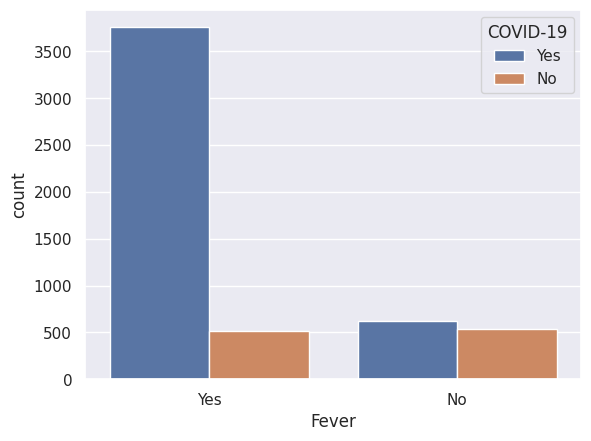

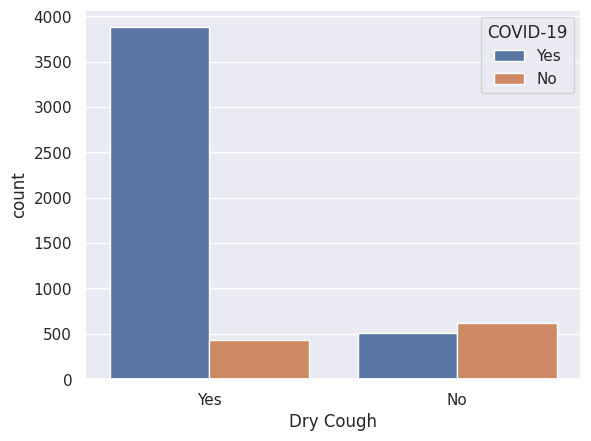

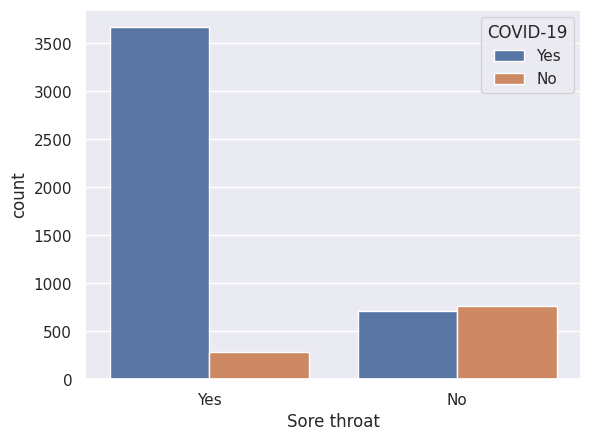

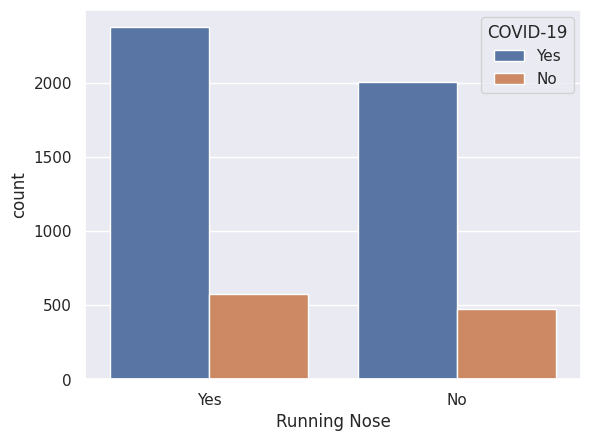

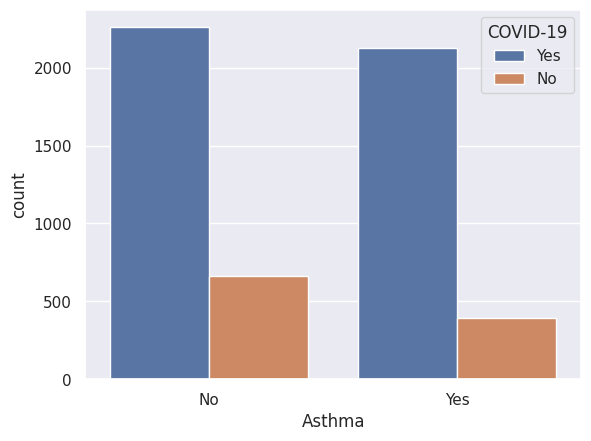

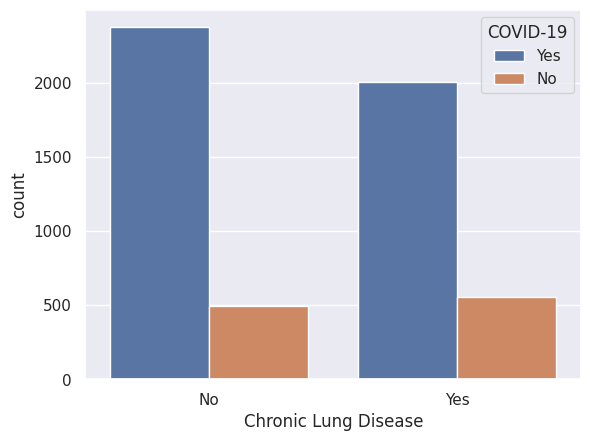

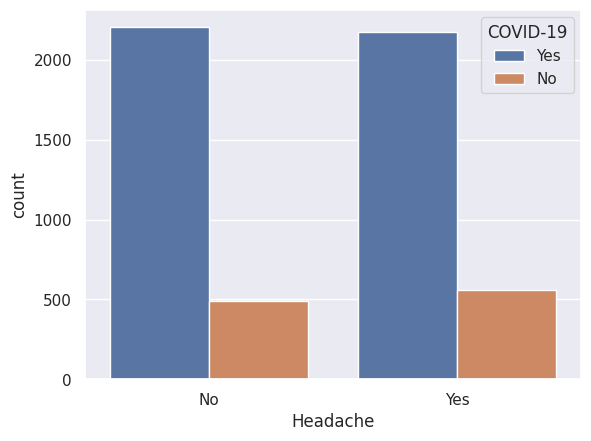

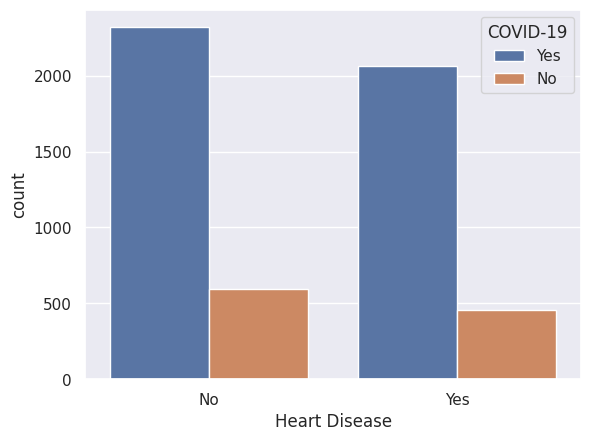

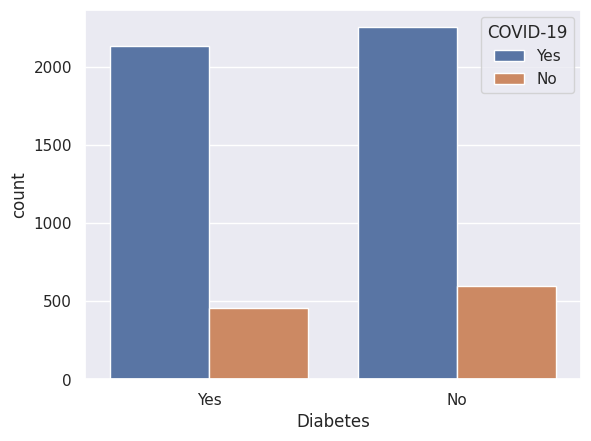

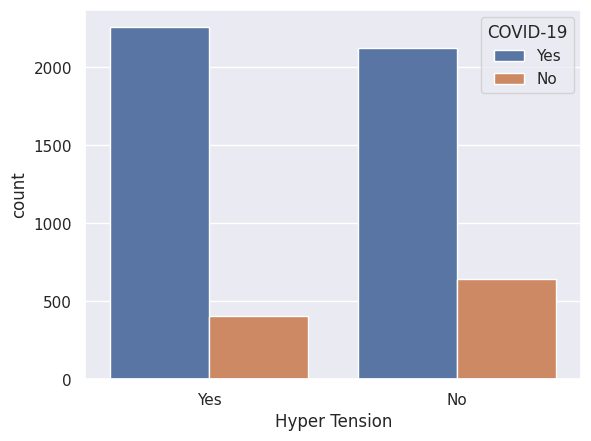

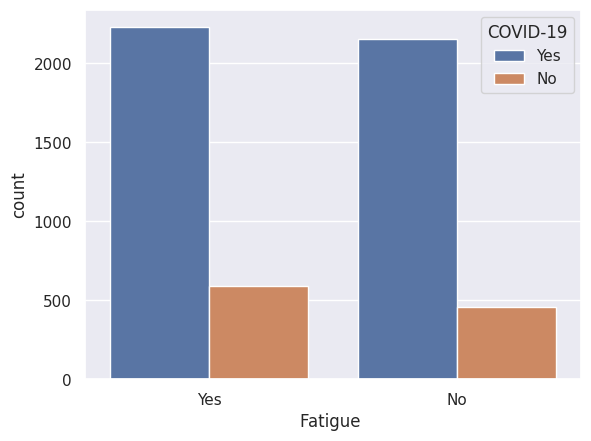

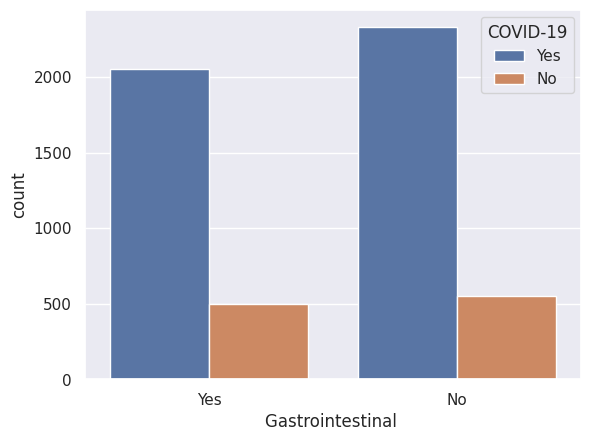

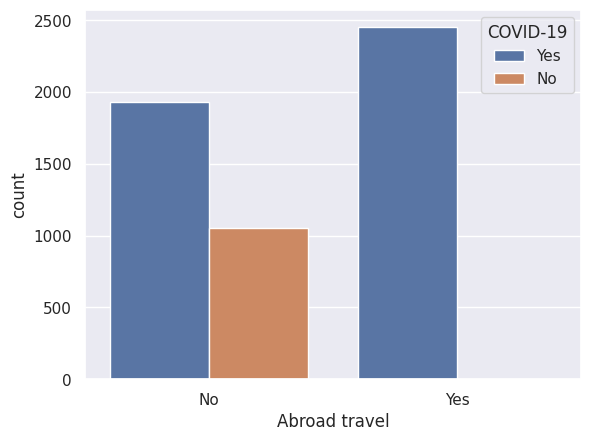

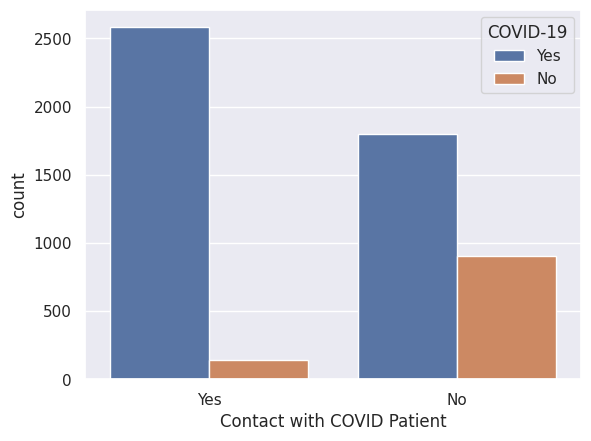

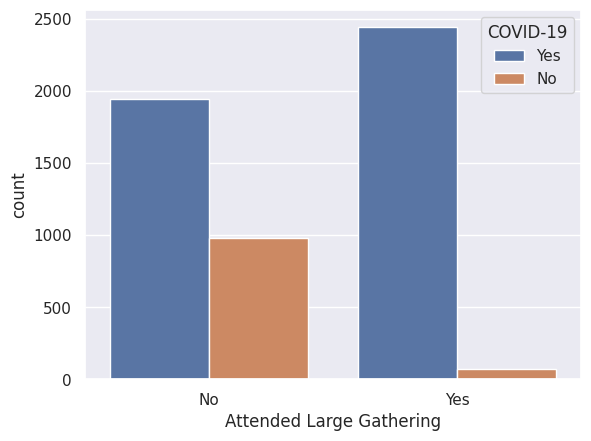

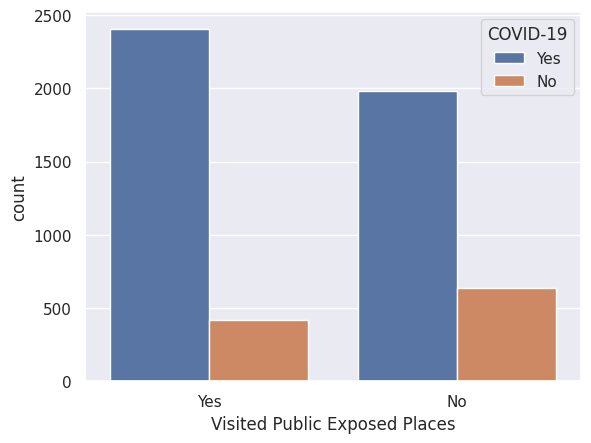

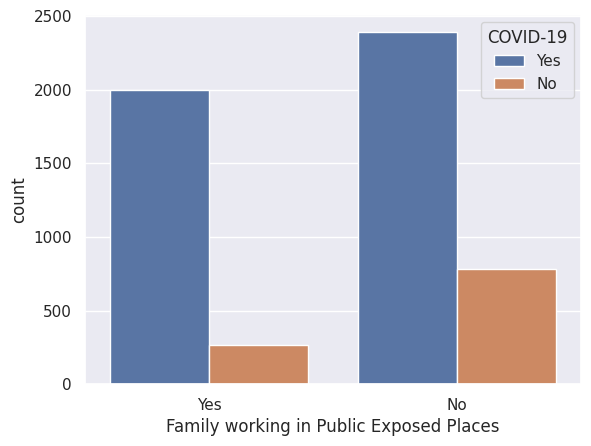

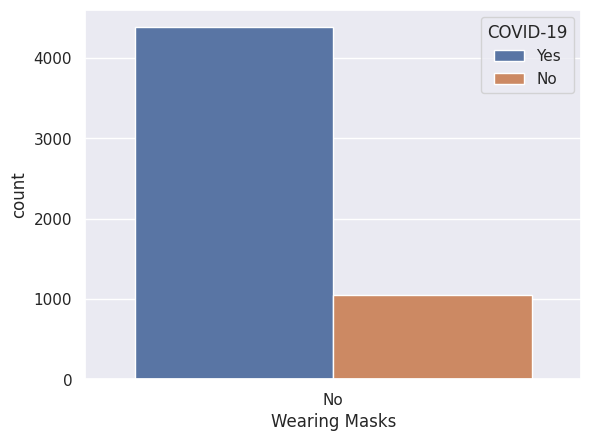

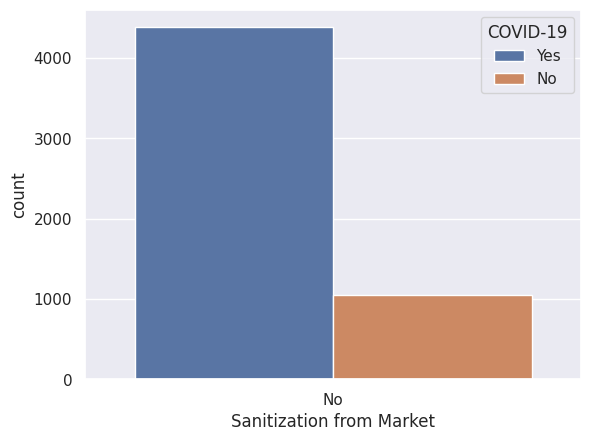

In [13]:
for feature in features:
    plt.figure()
    sns.countplot(x= feature,hue='COVID-19',data=covid)
    plt.savefig('covi-1.png')



In [14]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
mcolumns=["Breathing Problem","Fever","Dry Cough","Sore throat","Headache","Running Nose","Asthma","Chronic Lung Disease","Chronic Lung Disease","Heart Disease","Diabetes","Hyper Tension","Abroad travel","Contact with COVID Patient","Attended Large Gathering","Visited Public Exposed Places","Family working in Public Exposed Places","Wearing Masks","Sanitization from Market","COVID-19","Dry Cough","Sore throat","Gastrointestinal ","Fatigue "]
for i in mcolumns:
  covid[i]=e.fit_transform(covid[i])
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [15]:
covid.isnull()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
correlation=covid.corr()
correlation

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,...,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,...,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,...,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,...,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,...,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,...,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,...,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,...,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,...,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,...,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


In [23]:
correlation.style.background_gradient(cmap='YlOrRd',text_color_threshold=0.408,axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


In [ ]:
#dcol=[["Running Nose","Asthma","Chronic Lung Disease","Chronic Lung Disease","Heart Disease","Diabetes","Gastrointestinal ","earing Masks","Sanitization from Market"]]
#covid.drop(dcol,axis=1)
covid=covid.drop('Running Nose',axis=1)
covid=covid.drop('Asthma',axis=1)
covid=covid.drop('Chronic Lung Disease',axis=1)
covid=covid.drop('Headache',axis=1)
covid=covid.drop('Heart Disease',axis=1)
covid=covid.drop('Diabetes',axis=1)
covid=covid.drop('Fatigue ',axis=1)
covid=covid.drop('Gastrointestinal ',axis=1)
covid=covid.drop('Wearing Masks',axis=1)
covid=covid.drop('Sanitization from Market',axis=1)

In [26]:
cov = covid
cov.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [27]:
correlation=cov.corr()
correlation.style.background_gradient(cmap='PuBu',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


In [28]:
x=cov.drop('COVID-19',axis=1)
y=cov['COVID-19']


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [30]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(4075, 20) (1359, 20) (4075,) (1359,)


In [31]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("****************************************")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("****************************************")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("***********************************************")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("************************************************")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [32]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.25%
****************************************
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.948413     0.978005  0.972515     0.963209      0.972268
recall       0.907595     0.988128  0.972515     0.947861      0.972515
f1-score     0.927555     0.983041  0.972515     0.955298      0.972284
support    790.000000  3285.000000  0.972515  4075.000000   4075.000000
****************************************
Confusion Matrix: 
 [[ 717   73]
 [  39 3246]]

Test Result:
Accuracy Score: 96.47%
***********************************************
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.931174     0.972122   0.96468     0.951648      0.964258
recall       0.881226     0.984517   0.96468     0.932872      0.964680
f1-score     0.905512     0.978281   0.96468     0.941896      0.964305
support    261.000000  1098.000000   0.96468  1359.0000

In [33]:
#decison tree represenation
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

print_score(dt_clf, x_train, y_train, x_test, y_test, train=True)
print_score(dt_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.36%
****************************************
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.949068     0.992049  0.983558     0.970559      0.983716
recall       0.967089     0.987519  0.983558     0.977304      0.983558
f1-score     0.957994     0.989779  0.983558     0.973886      0.983617
support    790.000000  3285.000000  0.983558  4075.000000   4075.000000
****************************************
Confusion Matrix: 
 [[ 764   26]
 [  41 3244]]

Test Result:
Accuracy Score: 98.01%
***********************************************
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.943182     0.989041  0.980132     0.966111      0.980234
recall       0.954023     0.986339  0.980132     0.970181      0.980132
f1-score     0.948571     0.987688  0.980132     0.968130      0.980176
support    261.000000  1098.000000  0.980132  1359.0000

In [34]:
dt_clf = RandomForestClassifier()
dt_clf.fit(x_train, y_train)

print_score(dt_clf, x_train, y_train, x_test, y_test, train=True)
print_score(dt_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.36%
****************************************
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.949068     0.992049  0.983558     0.970559      0.983716
recall       0.967089     0.987519  0.983558     0.977304      0.983558
f1-score     0.957994     0.989779  0.983558     0.973886      0.983617
support    790.000000  3285.000000  0.983558  4075.000000   4075.000000
****************************************
Confusion Matrix: 
 [[ 764   26]
 [  41 3244]]

Test Result:
Accuracy Score: 98.01%
***********************************************
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.943182     0.989041  0.980132     0.966111      0.980234
recall       0.954023     0.986339  0.980132     0.970181      0.980132
f1-score     0.948571     0.987688  0.980132     0.968130      0.980176
support    261.000000  1098.000000  0.980132  1359.0000

In [35]:
dt_clf = GradientBoostingClassifier()
dt_clf.fit(x_train, y_train)

print_score(dt_clf, x_train, y_train, x_test, y_test, train=True)
print_score(dt_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.33%
****************************************
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.954660     0.990247  0.983313     0.972453      0.983348
recall       0.959494     0.989041  0.983313     0.974267      0.983313
f1-score     0.957071     0.989644  0.983313     0.973357      0.983329
support    790.000000  3285.000000  0.983313  4075.000000   4075.000000
****************************************
Confusion Matrix: 
 [[ 758   32]
 [  36 3249]]

Test Result:
Accuracy Score: 97.72%
***********************************************
CLASSIFICATION REPORT:
                    0            1  accuracy    macro avg  weighted avg
precision    0.945736     0.984559  0.977189     0.965148      0.977103
recall       0.934866     0.987250  0.977189     0.961058      0.977189
f1-score     0.940270     0.985903  0.977189     0.963086      0.977139
support    261.000000  1098.000000  0.977189  1359.0000

In [36]:
# quering the model for covid prediction
new = x_test.iloc[0]
a = np.asarray(new)
a = a.reshape(1,-1)
p = lr_clf.predict(a)
print(p)
if (p[0] == 1):
    print("Person is affected by Covid 19 and is at risk of dying")
else:
    print("Great! the results are negative and you don't have to worry")

[1]
Person is affected by Covid 19 and is at risk of dying
